In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

Welcome to JupyROOT 6.18/04


In [2]:
inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_momentum_rooFit/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [3]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_momentum_fit.root","RECREATE");

#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
#filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_overlay = 'NuCCana_overlay_V26_mar18.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

In [4]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	1012051
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	1.26811760704e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.0060278320856
Dirt:		0.0611423668132


In [5]:
if 1:
    filename_overlay = filename_overlay+'out4_noflux.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	1013969
Data: Number of Entries:	28004
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [6]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [7]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')

energy_cut = ' && MCle_Energy>0.15'

numu_signal = numu_signal+energy_cut
numu_true = numu_true+energy_cut
numu_nomu = numu_nomu+energy_cut
numu_lowpur = numu_lowpur+energy_cut
numu_nc = numu_nc+energy_cut
numu_ov = numu_ov+energy_cut
numu_other = numu_other+energy_cut

num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [8]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [9]:
track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

weight_name = 'EventWeight*TunedCentralValue_Genie'


In [10]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/20.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [11]:
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [12]:
from array import array
mom_bins = [ 0.15, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1
h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

In [13]:
# calculate total flux integrated cross section:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1' #\
                #&& MCle_Energy>0 && MCle_Energy<2.5 && TrackMomMCS_mom>0 && TrackMomMCS_mom<2.5'


In [14]:
#RootFile = ROOT.TFile("/home/tmettler/Desktop/ub_data/mcc9.1/"\
#    +"v08_00_00_33/V08_00_00_35/fitting/tutorial/RooFit-tutorial/hists/xsec_histos.root","RECREATE");

RootFile = ROOT.TFile(output_filedir+"xsec_momentum_fit.root","RECREATE");

In [15]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

In [16]:
n = 100
start = 0.15
end = 2.5
mom_bins2 = np.zeros((n+1))
for i in range(n+1):
    mom_bins2[i] = (end-start)/n*i+start
binnum2 = len(mom_bins2) - 1
print mom_bins2

#mom_bins2 = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
#binnum2 = len(mom_bins) - 1

[0.15   0.1735 0.197  0.2205 0.244  0.2675 0.291  0.3145 0.338  0.3615
 0.385  0.4085 0.432  0.4555 0.479  0.5025 0.526  0.5495 0.573  0.5965
 0.62   0.6435 0.667  0.6905 0.714  0.7375 0.761  0.7845 0.808  0.8315
 0.855  0.8785 0.902  0.9255 0.949  0.9725 0.996  1.0195 1.043  1.0665
 1.09   1.1135 1.137  1.1605 1.184  1.2075 1.231  1.2545 1.278  1.3015
 1.325  1.3485 1.372  1.3955 1.419  1.4425 1.466  1.4895 1.513  1.5365
 1.56   1.5835 1.607  1.6305 1.654  1.6775 1.701  1.7245 1.748  1.7715
 1.795  1.8185 1.842  1.8655 1.889  1.9125 1.936  1.9595 1.983  2.0065
 2.03   2.0535 2.077  2.1005 2.124  2.1475 2.171  2.1945 2.218  2.2415
 2.265  2.2885 2.312  2.3355 2.359  2.3825 2.406  2.4295 2.453  2.4765
 2.5   ]


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/png/mom_truth_sig.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/root/mom_truth_sig.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/pdf/mom_truth_sig.pdf has been created
Warning in <TFile::Append>: Replacing existing TH1: h_true (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/png/mom_truth.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/root/mom_truth.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/pdf/mom_truth.pdf has been created


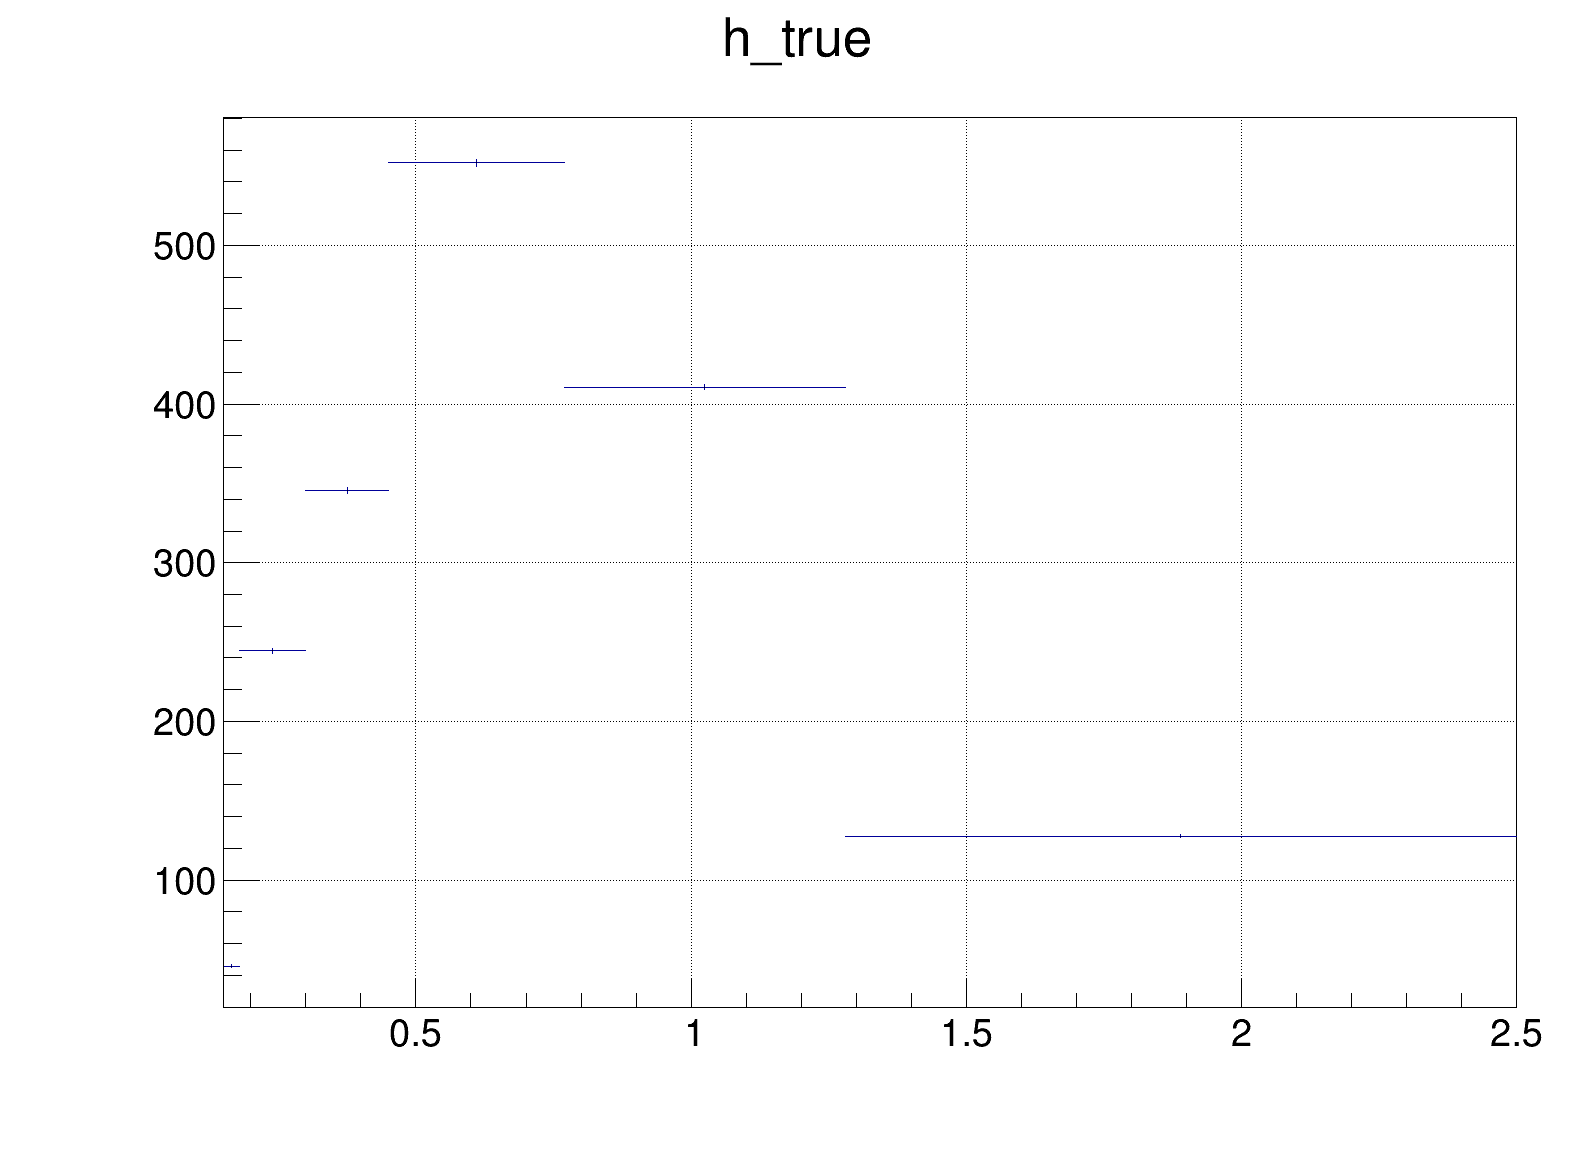

In [17]:
h_true = ROOT.TH1F('h_true','h_true',binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy>>h_true',weight_name+'*('+cut+' && numu_signal)')
#globale.overlay_out.Draw('MCle_Energy>>h_true',weight_name+'*(1 && numu_true)')
h_true.Scale(scale[overlay])
h_true.Write('mom_truth_sig')
h_true.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + 'mom_truth_sig.png')
c1.SaveAs(globale.outputdir_root + 'mom_truth_sig.root')
c1.SaveAs(globale.outputdir_pdf + 'mom_truth_sig.pdf')

h_true = ROOT.TH1F('h_true','h_true',binnum,array('f',mom_bins))
#globale.overlay_out.Draw('MCle_Energy>>h_true',weight_name+'*('+cut+' && numu_signal)')
globale.overlay_out.Draw('MCle_Energy>>h_true',weight_name+'*(1 && numu_true)')
h_true.Scale(scale[overlay])
h_true.Write('mom_truth')
h_true.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + 'mom_truth.png')
c1.SaveAs(globale.outputdir_root + 'mom_truth.root')
c1.SaveAs(globale.outputdir_pdf + 'mom_truth.pdf')
#h_true.Draw()
#c1.Draw()

0
45.7461433411 10.4259223738 10.4259223738
1
244.451705933 93.6681402223 93.6681402223
2
345.564697266 166.185712756 166.185712756
3
552.046936035 317.897324819 317.897324819
4
410.678192139 277.138374864 277.138374864
5
127.770111084 88.0760579556 88.0760579556


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/png/h_template0.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/root/h_template0.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/pdf/h_template0.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/png/h_template1.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/root/h_template1.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/pdf/h_template1.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/we

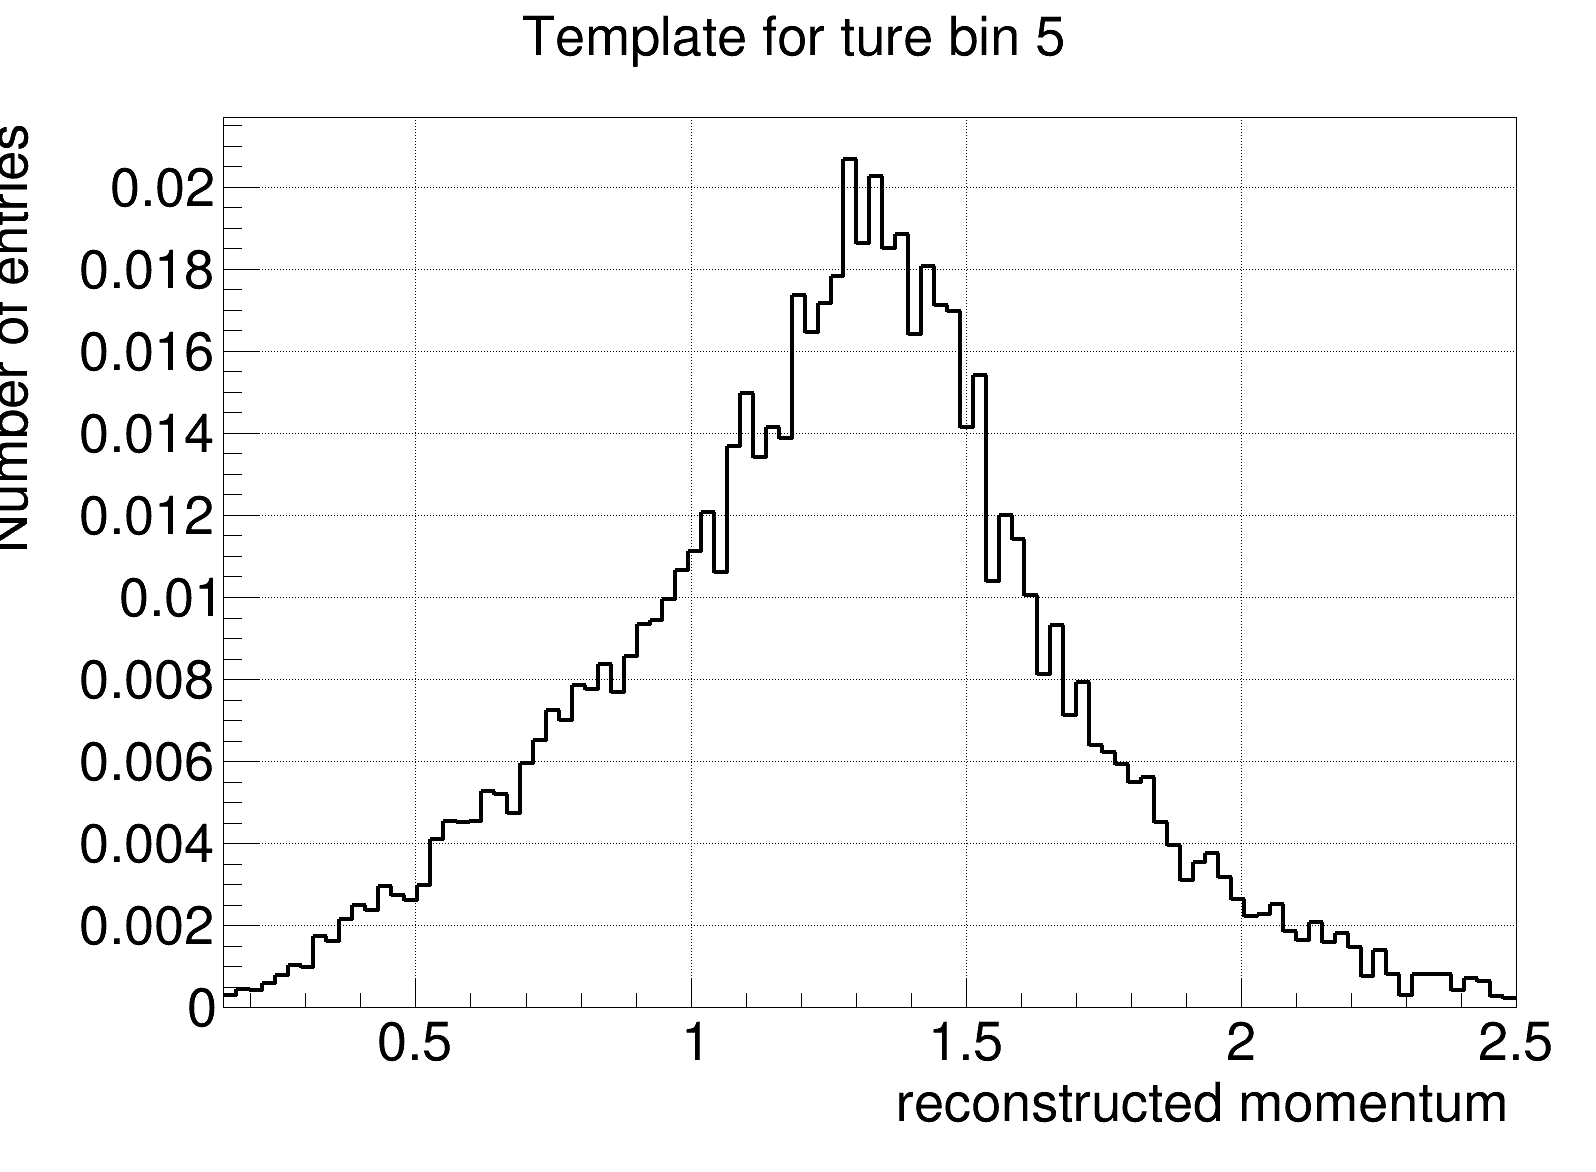

In [18]:
h_temp = []
h_temp_r = []
for i in range(binnum):
    print i
    h_temp.append(ROOT.TH1F('h_temp['+str(i)+']','Template for ture bin '+str(i),binnum2,array('f',mom_bins2)))
    h_temp_r.append(ROOT.TH1F('h_temp_r['+str(i)+']','h_temp_r['+str(i)+']',binnum2,array('f',mom_bins2)))
    bincut = 'MCle_Energy < '+str(mom_bins[i+1])+' && MCle_Energy > '+str(mom_bins[i])
    #print bincut TrackMomMCS_mom TrackMomRange_mu
    globale.overlay_out.Draw('TrackMomMCS_mom>>h_temp['+str(i)+']',weight_name+'*('+cut+'&&'+bincut+' && numu_signal && track_end_uncontained)')
    globale.overlay_out.Draw('TrackMomRange_mu>>h_temp_r['+str(i)+']',weight_name+'*('+cut+'&&'+bincut+' && numu_signal && !track_end_uncontained)')
    h_temp[i].Add(h_temp_r[i])
    
    h_temp[i].Scale(scale[overlay])
    print h_true.GetBinContent(i+1), h_temp[i].Integral(), h_temp[i].GetSumOfWeights()
    scale_ = 1.0/(h_true.GetBinContent(i+1))
    h_temp[i].Scale(scale_)
    
    h_temp[i].SetXTitle("reconstructed momentum")
    h_temp[i].SetYTitle("Number of entries")
    h_temp[i].GetYaxis().SetTitleSize(0.05)
    h_temp[i].GetYaxis().SetTitleOffset(0.0)
    h_temp[i].GetYaxis().SetLabelSize(0.05)
    h_temp[i].GetXaxis().SetTitleSize(0.05)
    h_temp[i].GetXaxis().SetLabelSize(0.05)
    h_temp[i].GetXaxis().SetTitleOffset(1)
    h_temp[i].SetLineColor(ROOT.kBlack)
    h_temp[i].SetLineWidth(4)
    h_temp[i].Draw('hist')
    h_temp[i].Write('mom_reco_'+str(i))
    c1.Draw()
    c1.SaveAs(globale.outputdir_png + 'h_template'+str(i)+'.png')
    c1.SaveAs(globale.outputdir_root + 'h_template'+str(i)+'.root')
    c1.SaveAs(globale.outputdir_pdf + 'h_template'+str(i)+'.pdf')

#del h_temp[:]

In [19]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'TrackMomMCS_mom'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_data = ROOT.TH1F("h_data",'h_data',binnum2,array('f',mom_bins2))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum2,array('f',mom_bins2))
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum2,array('f',mom_bins2))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum2,array('f',mom_bins2))
h_signal = ROOT.TH1F("h_signal",'h_signal',binnum2,array('f',mom_bins2))

h_data_r = ROOT.TH1F("h_data_r",'h_data_r',binnum2,array('f',mom_bins2))
h_ext_r = ROOT.TH1F("h_ext_r",'h_ext_r',binnum2,array('f',mom_bins2))
h_dirt_r = ROOT.TH1F("h_dirt_r",'h_dirt_r',binnum2,array('f',mom_bins2))
h_overlay_r = ROOT.TH1F("h_overlay_r",'h_overlay_r',binnum2,array('f',mom_bins2))
h_signal_r = ROOT.TH1F("h_signal_r",'h_signal_r',binnum2,array('f',mom_bins2))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

globale.data_out.Draw(variable+'>>h_data',cut+' && track_end_uncontained','')
globale.ext_out.Draw(variable+'>>h_ext',cut+' && track_end_uncontained','')
globale.dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+ '&& track_end_uncontained)','')
globale.overlay_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !numu_signal && track_end_uncontained)','')
globale.overlay_out.Draw(variable+'>>h_signal',weight_name+'*('+cut+'&& numu_signal && track_end_uncontained)','')

globale.data_out.Draw('TrackMomRange_mu'+'>>h_data_r',cut+' && !track_end_uncontained','')
globale.ext_out.Draw('TrackMomRange_mu'+'>>h_ext_r',cut+' && !track_end_uncontained','')
globale.dirt_out.Draw('TrackMomRange_mu'+'>>h_dirt_r',weight_name+'*('+cut+ '&& !track_end_uncontained)','')
globale.overlay_out.Draw('TrackMomRange_mu'+'>>h_overlay_r',weight_name+'*('+cut+'&& !numu_signal && !track_end_uncontained)','')
globale.overlay_out.Draw('TrackMomRange_mu'+'>>h_signal_r',weight_name+'*('+cut+'&& numu_signal && !track_end_uncontained)','')

h_data.Add(h_data_r)
h_ext.Add(h_ext_r)
h_dirt.Add(h_dirt_r)
h_overlay.Add(h_overlay_r)
h_signal.Add(h_signal_r)

h_data.Scale(scale[data])
h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale[overlay])

h_background = h_ext.Clone()
h_background.Add(h_dirt)
h_background.Add(h_overlay)

h_data.Write('data_reco')
h_background.Write('mom_bkg_reco')
h_signal.Scale(scale[overlay])
h_signal.Add(h_background)
h_signal.Write('mc_reco')


2011

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/png/h_data.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/root/h_data.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/pdf/h_data.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/png/mom_bkg_reco.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/root/mom_bkg_reco.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/pdf/mom_bkg_reco.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_

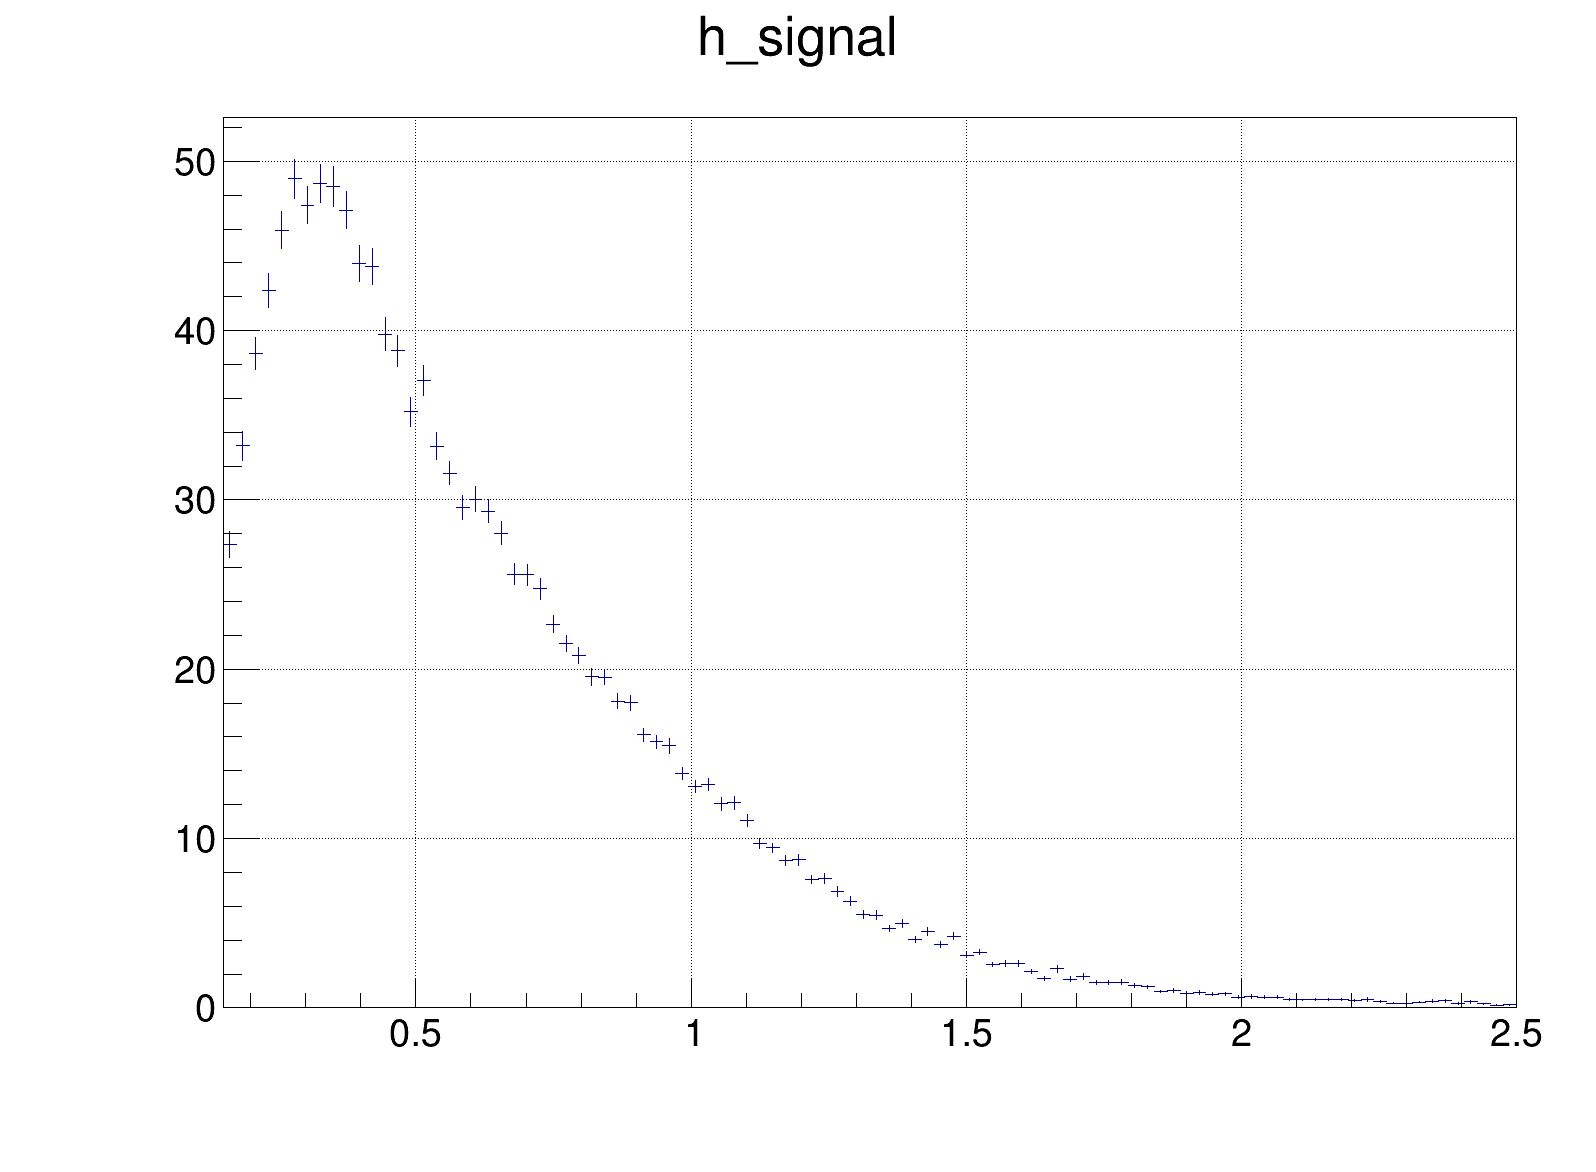

In [20]:
h_data.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + 'h_data.png')
c1.SaveAs(globale.outputdir_root + 'h_data.root')
c1.SaveAs(globale.outputdir_pdf + 'h_data.pdf')

h_background.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + 'mom_bkg_reco.png')
c1.SaveAs(globale.outputdir_root + 'mom_bkg_reco.root')
c1.SaveAs(globale.outputdir_pdf + 'mom_bkg_reco.pdf')

h_signal.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + 'mc_reco.png')
c1.SaveAs(globale.outputdir_root + 'mc_reco.root')
c1.SaveAs(globale.outputdir_pdf + 'mc_reco.pdf')

In [21]:
RootFile.Close()